In [2]:
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#scikit-learn imports
from sklearn.datasets import make_classification, make_regression #for generating datasets
from sklearn.linear_model import LogisticRegression #logistic regression from their linear models
from sklearn.model_selection import train_test_split #model selection for cross validation and train-test split
from sklearn.metrics import roc_auc_score #metrics, here roc_auc

In [4]:
#Generating a dataset (X = data, y = label)
X, y = make_classification(n_samples=400, 
                          n_features=20,
                          n_informative=4, #so 16 features = noise
                          random_state=319) #like set seed

In [5]:
y.shape

(400,)

In [8]:
#The shape of X (the feature matrix) is important - two-dimensional numpy array!
X.shape

(400, 20)

In [9]:
#Splitting into train and test parts. test size = 0.2 = 1/5 of the data
#Basically all the preprocessing we do - splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=456)

## Fitting a model

In [10]:
model = LogisticRegression()

In [11]:
model.get_params()
# c = learning parameter, keeping at 1 is good if data is standardised
#max_iter you sometime want to change
#interesting is: solver and penalty
#tol: tolerance - if number is below this, it will be counted as nothing.
# A problem for EEG/MEG data, since the scale is negative - so the data either has to be standardised (best)
# or the tolerance should be changed

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
#fitting the model
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
#predicting the test data (sk-learn does not take strings - but 0s and 1s)
model.predict(X_test)

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [14]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0])

In [15]:
#Roc_auc score - real values compared to predicted values
roc_auc_score(y_test, model.predict(X_test))

0.7374999999999999

In [19]:
#The coefficients in the model
model.coef_
#weights/betas (in this case: same as beta values in logistic regression - in neural networks, they would be called weights)
#One value for each feature (20).

array([-0.2057935 ,  0.54226485, -0.03090412, -0.01577295,  0.06877635,
        0.10191679, -0.03347374,  0.08108813,  0.02797567,  0.44881654,
        0.13845209, -0.13675989, -0.04539756, -0.17579141,  0.30156148,
       -0.05377287,  0.02380302, -0.17509133, -0.05606177, -0.10919213])

In [20]:
#since it is logistic regression, here we could take the exp of it to get a bit interpretation
np.exp(model.coef_)
#further from 0, the more it points to being one class or the other.
#how logistic regression would usually be interpreted (but interpretability is difficult - next week's topic)

array([[0.81400115, 1.71989777, 0.96956853, 0.98435079, 1.07119661,
        1.10729133, 0.96708031, 1.08446646, 1.02837067, 1.56645725,
        1.14849466, 0.87217962, 0.95561749, 0.83879293, 1.35196823,
        0.94764732, 1.02408858, 0.83938036, 0.94548073, 0.89655815]])

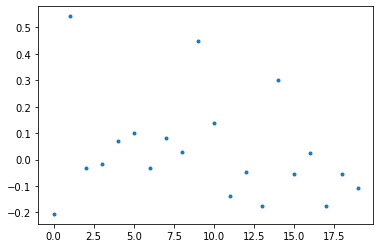

In [17]:
#Plotting coefficients
plt.plot(model.coef_[0], '.');

# Logistic regression with l1 penalty 
Hint change solver to "saga"

In [21]:
#Change penalty and solver (saga is the only one that can run l1 penalty)
model_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)

In [22]:
model_l1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [23]:
#roc - increased from before (now with regularisation: l1 penalty)
roc_auc_score(y_test, model_l1.predict(X_test))

0.775

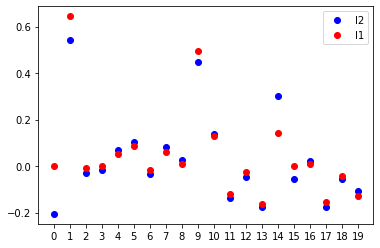

In [26]:
#plotting
plt.plot(model.coef_[0], 'ob', label="l2");
plt.plot(model_l1.coef_[0], 'or', label="l1");
plt.xticks(np.arange(0, 20));
plt.legend()
#you can see that the l1 shrinks them towards the center (towards 0 on the y-axis)

# Create a pipeline

In [28]:
#Mean and sd are not standardised
print(X.mean())
print(X.std())
#if we standardise for logistic regression, we will get a better fit (mena = 0, sd = 1)
#don't standardise all data - it should be part of your cross-validation scheme (doing this using pipeline below)

0.04847776213790114
1.229791536909913


In [29]:
#importing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler #to z-score our data

In [30]:
#creating pipeline first standardising, then creating linear regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [31]:
pipeline
#if needing to "grab" it later, use the string version below

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [32]:
#fitting as above
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [33]:
#roc score as above
roc_auc_score(y_test, pipeline.predict(X_test))
#Here we do not actually get a better fit by standardising, but most of the times you would.

0.7374999999999999

## Cross-validation

In [34]:
#importing
from sklearn.model_selection import (StratifiedShuffleSplit,
                                     cross_val_score) #runs the pipeline overall the cross-validation (does the hard work)
##stratified: if unbalanced data, the ratio will be kept the same in every fold - to reduce bias.
# Does not affect anything for a perfectly balanced dataset.
# There are many different ways of doing cross-validation in scikit-learn - so keep in mind tha tyou keep the right one for what you want

In [35]:
#making cross-validation object
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, 
                           random_state=234326)

In [36]:
cv.split(X, y)

<generator object BaseShuffleSplit.split at 0x0000023369AAADB0>

In [37]:
#printing all the test split in folds by lists
for train_idx, test_idx in cv.split(X, y):
    print(test_idx)

[159 180 349 207  78 255 360 185  68  99 376 276 383  14 377 247 186 176
 302 143 326 111 273 244 187 217 223 157 220  36 112 337 292 115  44   9
 395 142  46 336  62 355 338  86 163  21 234 329  27 301  79 121 316 354
 118 215 282  56  65  87 260 264 259 193 284 167  45 178 339 235  32  75
 184 278 241 219  66 212 173  88]
[ 66 273  67 120  65 171 364 173 136 180  17 329 109 325 378 215 277   4
 387  53 107 235  70  98 342 244 124 212  88 279 176  31 149 175 161 200
 311 145  40 344 326 355  59 207 111  58 233 178  42 147 257 196 294 123
  92 174 143 126  76 236  90 157 260 289 208  75 163 160 339 332 221 177
 276 117  26  27 142 104 259  29]
[321  35 182  46  66 216 142 193 112 102  57 302  83 253 174  29 143 275
 329  72 206 368 158 130 243 291 255  26 233  96 355 177 160 176  91  20
 384 148  79  47 196 373  16  58 332  98  92 240  54 188 167 388  73 294
  90 292  87  94 280 378 159 385 203 277 330 251 310 351 139 226 145  89
 126 320 265 210 390 323  97  84]
[ 61 155 398 270 135  

In [38]:
# An entire cross-validation in a single line
scores = cross_val_score(pipeline, X, y, cv=cv, scoring="roc_auc")
#We are giving it the full matrix (X) and y. cv = 5-fold default. And scoring is how we are scoring it.
# all it takes to do a full cross-validated score

In [39]:
#five-fold score
scores

array([0.801875, 0.754375, 0.698125, 0.7925  , 0.74875 ])

In [40]:
#what we actually want from the folds (mean + sd)
scores.mean()

0.7591249999999999

In [41]:
#what we actually want from the folds (mean + sd
scores.std()

0.03685825891167406

Showing how the standardscaler works

In [42]:
stdscl = StandardScaler()

In [43]:
stdscl.fit(X)

StandardScaler()

In [44]:
stdscl.scale_
#_ is things that have been estimated after fitting the model - before fitting, these params do not exist

array([1.69331248, 1.48752599, 0.95044558, 0.93687538, 0.96746324,
       0.99522461, 0.97867092, 0.97119308, 0.9031551 , 1.60275499,
       1.03067526, 0.98991225, 0.91576177, 1.00574026, 1.548512  ,
       1.88469943, 1.05514967, 0.96435324, 1.00411708, 1.28750254])

In [49]:
#dir(model)
#_ are things that have been estimated after fitting the model - before fitting, these params do not exist

In [46]:
stdscl.mean_

array([-0.04529135, -0.54250006,  0.04172557, -0.0475451 , -0.10604623,
        0.04313583,  0.06551255, -0.03673796, -0.02657711,  0.54552966,
        0.02521984,  0.04041969,  0.04325657, -0.02899043,  0.10541518,
        0.99634323, -0.03549314,  0.02731322,  0.08906314, -0.18419789])

In [47]:
#probability of belonging to each class for the first ten - tells how certain your classifier is in it's classifications
pipeline.predict_proba(X_test[:10])

array([[0.44520386, 0.55479614],
       [0.33062123, 0.66937877],
       [0.44761688, 0.55238312],
       [0.33460162, 0.66539838],
       [0.55616509, 0.44383491],
       [0.68384969, 0.31615031],
       [0.62594683, 0.37405317],
       [0.35375108, 0.64624892],
       [0.23859072, 0.76140928],
       [0.12613637, 0.87386363]])

## Plot a roc curve
= our task

In [54]:
#importing
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix, confusion_matrix

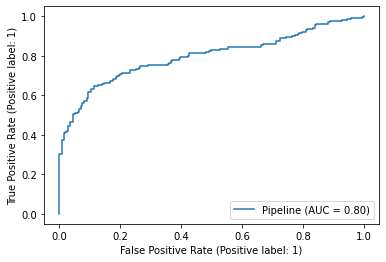

In [53]:
#sklearn.metrics.plot_roc_curve(estimator, X, y, *, sample_weight=None, drop_intermediate=True, response_method='auto', name=None, ax=None, pos_label=None, **kwargs)

#plot_roc_curve(pipeline, X, y, sample_weight=None, drop_intermediate=True, response_method='auto', name=None, ax=None, pos_label=None)
plot_roc_curve(pipeline, X, y)
#using the full data (pipeline). If to be recorded for a paper, you use the test data.
#roc = relation between false positive and true positive rate. (the closer to top left corner, the better)

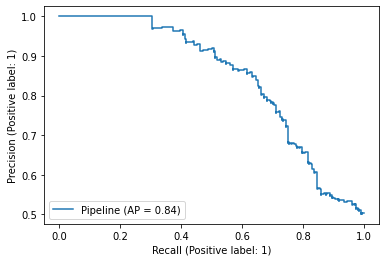

In [55]:
#Precision-recall curve
plot_precision_recall_curve(pipeline, X, y)

In [ ]:
# Confusion matrix
#plot_confusion_matrix()

# Ridge and Lasso

Repeat the pipeline from above using a Ridge regression on data generated below. 

QUESTION: What is difference between Ridge and RidgeCV?

In [68]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [69]:
X, y, w = make_regression( #a regression problem now - NOT classification
    n_samples=200, n_features=10, coef=True, random_state=5255, bias=3.5
)

# w is the weight that the data generating model is build on, i.e. the ground truth

In [63]:
#creating pipeline first standardising, then creating linear regression
pipeline_Ridge = make_pipeline(StandardScaler(), Ridge())

In [70]:
#Splitting into train and test parts. test size = 0.2 = 1/5 of the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=456)

In [71]:
#fitting
pipeline_Ridge.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [77]:
#coefficients
pipeline_Ridge.named_steps["ridge"].coef_

array([100.94543718,  49.66410964,  64.76144617,  69.85043691,
        24.74008178,  27.49938382,  23.88906916,  64.85750593,
       101.61477608,  85.82346506])

In [73]:
w

array([98.8291441 , 46.4276265 , 68.19611763, 68.15165026, 26.85804853,
       28.31476062, 24.32733533, 64.33254665, 99.28400279, 93.54902659])

In [78]:
#diff between the weights and the coefficients
mse = mean_squared_error(w, pipeline_Ridge.predict(X_test))
# SEE MADS' UPLOADED STUFF

ValueError: Found input variables with inconsistent numbers of samples: [10, 40]

In [62]:
#RidgeCV also makes a crossvalidation - runs it for different lambda parameters (default = 3) - a way to help you pick the right lambda

{'alpha': 0.5,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}